App                  0
Content Rating       1
Current Ver          8
Rating            1474
Installs             0
dtype: int64
                                                 App Content Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook       Everyone   
1                                Coloring book moana       Everyone   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...       Everyone   
3                              Sketch - Draw & Paint           Teen   
4              Pixel Draw - Number Art Coloring Book       Everyone   
5                         Paper flowers instructions       Everyone   
6            Smoke Effect Photo Maker - Smoke Editor       Everyone   
7                                   Infinite Painter       Everyone   
8                               Garden Coloring Book       Everyone   
9                      Kids Paint Free - Drawing Fun       Everyone   

          Current Ver  Rating     Installs  
0               1.0.0     4.1      10,000+  


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
//anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/index

App                object
Content Rating     object
Current Ver        object
Rating            float64
Installs           object
dtype: object
App                object
Content Rating     object
Current Ver        object
Rating            float64
Installs           object
dtype: object
App               0
Content Rating    0
Current Ver       0
Rating            0
Installs          0
dtype: int64
['10,000+' '500,000+' '5,000,000+' '50,000,000+' '100,000+' '50,000+'
 '1,000,000+' '10,000,000+' '5,000+' '100,000,000+' '1,000,000,000+'
 '1,000+' '500,000,000+' '100+' '500+' '10+' '5+' '50+' '1+']
[4.1 3.9 4.7 4.5 4.3 4.4 3.8 4.2 4.6 3.2 4.  4.8 4.9 3.6 3.7 3.3 3.4 3.5
 3.1 5.  2.6 3.  1.9 2.5 2.8 2.7 1.  2.9 2.3 2.2 1.7 2.  1.8 2.4 1.6 2.1
 1.4 1.5 1.2]
['Everyone' 'Teen' 'Everyone 10+' 'Mature 17+' 'Adults only 18+']
1                     3623
Varies with device    1415
2                     1393
3                      811
4                      584
5                      398
6         

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


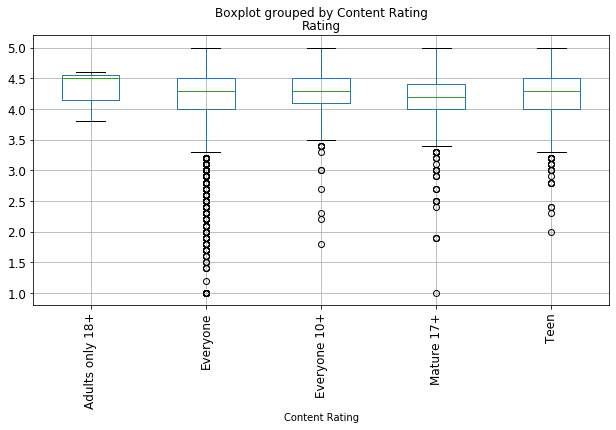

In [23]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

# Set some Pandas options
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 25)
df = pd.read_csv("./google-play-store-apps/googleplaystore.csv")
# print(df.columns)
version_content = df[["App","Content Rating", "Current Ver","Rating", "Installs"]]
print(version_content.isnull().sum())
print(version_content.head(10))
# replace all NA's with 0
cleanedCR = version_content["Content Rating"].fillna('Unrated')
version_content["Content Rating"] = cleanedCR
version_content.loc[version_content['Content Rating'] == 'Unrated', 'Content Rating'] = 'Everyone'

# cleanedCV = version_content["Current Ver"].fillna('1.0.0')
# version_content["Current Ver"] = cleanedCV
print(version_content.isnull().sum())
version_content["Current Ver"]= version_content["Current Ver"].str.split(".", n = 1, expand = True)
version_content.loc[version_content['Current Ver'] == '0', 'Current Ver'] = '1'
print(version_content.dtypes)
version_content['Current Ver'] = version_content['Current Ver'].astype(str)
print(version_content.dtypes)
# print(version_content.loc[version_content['Current Ver'].str.startwith('v', na=False)])
# get the number of missing data points per column
version_content = version_content[version_content['Rating'] != 19.0]
version_content = version_content[pd.notnull(version_content['Rating'])]
missing_values_count = version_content.isnull().sum()


version_content.boxplot(column='Rating', by='Content Rating',rot=90, fontsize=12, figsize=(10,5), grid=True)

# look at the # of missing points in the first ten columns
print(missing_values_count)
print(version_content["Installs"].unique())
print(version_content["Rating"].unique())
print(version_content["Content Rating"].unique())
print(version_content["Current Ver"].value_counts())
df = pd.DataFrame(version_content["Current Ver"].value_counts())
#                   , columns= ['Unique values','Count'])
df.to_csv( "./UniqueCV.csv")

Text(0, 0.5, 'Density')

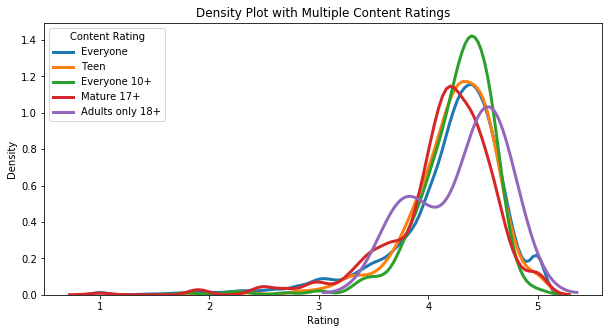

In [16]:
categories = version_content["Content Rating"].unique()
# Iterate through the Different Categories of Content Rating
plt.figure(figsize=(10,5))
for category in categories:
    # Subset to the category
    subset = version_content[version_content['Content Rating'] == category]
    # Draw the density plot
    sns.distplot(subset['Rating'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = category)
    
# Plot formatting
plt.legend(prop={'size': 10}, title = 'Content Rating', fontsize=12)
plt.title('Density Plot with Multiple Content Ratings')
plt.xlabel('Rating')
plt.ylabel('Density')

In [17]:
df_dummies = pd.get_dummies(version_content['Content Rating'])
del df_dummies[df_dummies.columns[-1]]
df_new = pd.concat([version_content, df_dummies], axis=1)
print(df_new.columns)
del df_new["App"]
del df_new["Content Rating"]
del df_new["Current Ver"]
del df_new["Installs"]
x = df_new.values
print(x)
correlation_matrix = np.corrcoef(x.T)
print(correlation_matrix)

Index(['App', 'Content Rating', 'Current Ver', 'Rating', 'Installs',
       'Adults only 18+', 'Everyone', 'Everyone 10+', 'Mature 17+'],
      dtype='object')
[[4.1 0.  1.  0.  0. ]
 [3.9 0.  1.  0.  0. ]
 [4.7 0.  1.  0.  0. ]
 ...
 [5.  0.  1.  0.  0. ]
 [4.5 0.  0.  0.  1. ]
 [4.5 0.  1.  0.  0. ]]
[[ 1.          0.00376082 -0.02045247  0.0267162  -0.03017706]
 [ 0.00376082  1.         -0.03496428 -0.00376597 -0.00407274]
 [-0.02045247 -0.03496428  1.         -0.41095536 -0.44443158]
 [ 0.0267162  -0.00376597 -0.41095536  1.         -0.04786926]
 [-0.03017706 -0.00407274 -0.44443158 -0.04786926  1.        ]]


In [19]:
contengency_table_race_edu = pd.crosstab(version_content["Rating"],version_content["Content Rating"])
contengency_table_race_edu
st.chi2_contingency(contengency_table_race_edu)

(204.2543987056991,
 0.0030107963236788,
 152,
 array([[5.12491992e-03, 1.26773436e+01, 6.78197736e-01, 7.87529362e-01,
         1.85180440e+00],
        [3.20307495e-04, 7.92333974e-01, 4.23873585e-02, 4.92205851e-02,
         1.15737775e-01],
        [9.60922486e-04, 2.37700192e+00, 1.27162076e-01, 1.47661755e-01,
         3.47213325e-01],
        [9.60922486e-04, 2.37700192e+00, 1.27162076e-01, 1.47661755e-01,
         3.47213325e-01],
        [1.28122998e-03, 3.16933590e+00, 1.69549434e-01, 1.96882340e-01,
         4.62951100e-01],
        [2.56245996e-03, 6.33867179e+00, 3.39098868e-01, 3.93764681e-01,
         9.25902199e-01],
        [2.56245996e-03, 6.33867179e+00, 3.39098868e-01, 3.93764681e-01,
         9.25902199e-01],
        [4.16399744e-03, 1.03003417e+01, 5.51035661e-01, 6.39867606e-01,
         1.50459107e+00],
        [3.84368994e-03, 9.50800769e+00, 5.08648302e-01, 5.90647021e-01,
         1.38885330e+00],
        [2.56245996e-03, 6.33867179e+00, 3.39098868e-01, 3.937

<h5>Relation between App Rating and Content Rating</h5>
<p>As the p-value is smaller than 0.05 we can tell that there is no relation between the Content Rating column and app Rating</p>